# this notebook represents short-term forecasting (daily)

refs:


1.   https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
2.   (sklearn)https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
3.   https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55
4.   https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python
5.   https://paperswithcode.com/paper/forecasting-foreign-exchange-rate-a
6. https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb
7. https://arxiv.org/pdf/2005.08067.pdf (sktime paper-metrics p9)








fine tuning RF : 

*   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
*   xgboost: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
* to read: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d 



Regarding a machine learning paper, consider starting by reviewing papers related to your work (Google Scholar may help) and write a section about it (keep in mind how your work relates to them and what innovation it brings to the field, and write about it). Then write sections for describing your dataset(s), for describing your algorithms and methodology, and why you have selected them. Also, don’t forget to write about your results (you will see how a machine learning paper is organized by reviewing other papers anyway).

At the end, get ready to answer the reviews you will receive some time after submitting.

It would be easier if you already have academic experience on researching or if you have a professor or experienced researcher to advise you with that. Also, at least talk to someone with academic experience to advise you WHERE you should submit your paper, given your work subject.

In summary: yes, you can! But it will be a lot easier if you have an advisor, at least…




One also needs to choose the journal which is most suited to the subject field of the article. Is the article a review article or a piece of original investigation? Does the study provide incremental gains in knowledge or is there something exceptionally novel to report? Journals and fields will vary in what they consider appropriate and which formats they publish.

Depending on the journal, choosing an appropriate editor(s) is the final step. There may be a list of editors and reviewers to choose from and it makes sense to choose someone who works in a closely related field.

The stages of publishing research may differ by field and publisher, but broadly you'll follow these steps:

Do the research
Decide what research results you want to publish together as an account of your research findings. This should be decided independently of the direction of the results, i.e. whether or not you got the results you wanted.
Discuss authorship with those who contributed to the research
Draft the text, tables and figures and work with all the authors on revising and editing the paper. Anyone involved in this process who is not an author should be acknowledged.
Optionally, get feedback from colleagues about the manuscript
Optionally, get the paper edited by a language editing service
Get approval from all the authors of the version to be submitted
Agree among the authors where you will submit and how any page charges or article processing charges will be paid
Have the underlying data and any code ready to share on request or ideally deposit this publicly. Also have documentation such as of ethics approval ready.
Prepare a cover letter and the manuscript files
Read the instructions for authors of the target journal, check you comply with their policies
Submit the article via the online submission
The article will undergo different initials checks / triage depending on the journal, such as scope or issues like reporting.
If the paper is not rejected, it will be assigned to an editor, either a staff editor or an academic editor. In some journals, the Editor-in-Chief decides this allocation.
The editor will decide if the paper is suitable for peer review. If not, they may reject the paper (often called a “desk reject”) or ask for revisions. Some journals discuss decisions or require approval by the EiC or a section editor, others give individual editors autonomy in their decisions.
Most journals require peer review before a paper can be accepted, though some rely on editorial review. Peer reviewers are experts in the topic and/or methods of the research. They may be selected from a database of reviewers, researchers the editors knows of themselves, or chosen based on their publication record.
Potential reviewers are asked to review, usually by email but occasionally by phone. If they agree, they will be sent the paper and given anything from a few days to several weeks to submit their review. The number of reviewers is usually two or three, but can vary. If reviewers decline, they may suggest alternatives. Publishing staff often support editors in this process.
Reviewers will usually send their comments via the online system or email. They might be asked to answer specific questions and are often asked about their recommendation (accept/revise/reject).
Once the editor has enough reviews, they will make their decision based on the reviews, the journal guidelines, and their own assessment of the paper and the reviewers' expertise. The editor may be able to overrule the reviewers. Their decision might need to be approved or discussed. They will send their decision, usually by email, to the authors.
If the article needs revisions, the authors will be asked to resubmit by a certain date. That deadline can often be extended. Authors might need to do more research, a reanalysis, or revise the language.
If the article is rejected, the authors might appeal the decision or be allowed to resubmit to the same journal if they address all the editor and reviewer concerns. Otherwise, go back to step 10 at the next journal of the authors' choice.
If revised, editor might make the next decision themselves or send the paper for re-review
Once accepted, the paper might be posted publicly as an “in press” version or this might wait until production is complete
During production, typesetting, formatting, copyediting and other checks will be performed by the publisher
The final article is then formally published, usually as HTML and/or PDF, and sent to indexing services

In [ ]:
#ref 1
#make zoom on pred vs test data
#make cross-correlation between pred-test data
#dont be overconfident with traditional accuracy metrics : r2, mae,...
#ref2
#A better alternative for cross validation on time series data (than K-fold CV) is 
#Forward Chaining strategy.

#sktime tuto github [6]
#1.2.1, 1.2.2, 1.3, 1.4.1, 3.3(tuning), 3.4 (ensembling)
#LSTM can overcome the problem of back-propagated error decay through memory blocks of LSTM. In 
#contrast, MLP) models very often face the problem ofoverfitting, backpropagated error decay, 
#and it cannot automatically determine the optimal time lags while fitting time-series data[5]

#ML mastery: xgboost, Random Forest

In [ ]:

from numpy import argsort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn import metrics
import numpy as np
import matplotlib.dates as mdates

In [ ]:
#read multivariate data
df=pd.read_csv('/content/clean_daily_df_human_logic_supervised.csv')
df.time=pd.to_datetime(df.time,dayfirst=True)
df.columns

Index(['time', 'MIN_TEMPERATURE_C_t_7', 'clients_day_t_7',
       'Holiday_Food_Related_t_7', 'consommation_t_7',
       'pdl_total_daily_load_t_7', 'max_pdl_daily_load_t_7', 'weekend_t_7',
       'MIN_TEMPERATURE_C_t_1', 'clients_day_t_1', 'Holiday_Food_Related_t_1',
       'consommation_t_1', 'pdl_total_daily_load_t_1',
       'max_pdl_daily_load_t_1', 'weekend_t_1', 'MIN_TEMPERATURE_C_t',
       'clients_day_t', 'Holiday_Food_Related_t', 'consommation_t',
       'pdl_total_daily_load_t', 'weekend_t', 'max_pdl_daily_load_t'],
      dtype='object')

In [ ]:
data=pd.read_csv('/content/clean_daily_df_human_logic_supervised.csv',
                 index_col='time')[['MIN_TEMPERATURE_C_t_7', 'clients_day_t_7',
       'Holiday_Food_Related_t_7', 'consommation_t_7',
       'pdl_total_daily_load_t_7', 'max_pdl_daily_load_t_7', 'weekend_t_7',

       'MIN_TEMPERATURE_C_t_1', 'clients_day_t_1', 'Holiday_Food_Related_t_1',
       'consommation_t_1', 'pdl_total_daily_load_t_1',
       'max_pdl_daily_load_t_1', 'weekend_t_1',
       
        'MIN_TEMPERATURE_C_t','clients_day_t', 'Holiday_Food_Related_t',
        'weekend_t', 'max_pdl_daily_load_t']].dropna()


In [ ]:
data.shape

(2032, 19)

In [ ]:
data.index=pd.to_datetime(data.index,dayfirst=True)

In [ ]:
data.head()

,MIN_TEMPERATURE_C_t_7,clients_day_t_7,Holiday_Food_Related_t_7,consommation_t_7,pdl_total_daily_load_t_7,max_pdl_daily_load_t_7,weekend_t_7,MIN_TEMPERATURE_C_t_1,clients_day_t_1,Holiday_Food_Related_t_1,consommation_t_1,pdl_total_daily_load_t_1,max_pdl_daily_load_t_1,weekend_t_1,MIN_TEMPERATURE_C_t,clients_day_t,Holiday_Food_Related_t,weekend_t,max_pdl_daily_load_t
time,,,,,,,,,,,,,,,,,,,
2015-01-08,8,3970,1,7068.81,16580,1433.0,0,13,3972,0,7468.64,20928,1319.0,0,13,3972,0,0,1379.0
2015-01-09,12,3970,0,7074.65,22006,1439.0,0,13,3972,0,7464.41,20809,1379.0,0,13,3972,0,0,1370.0
2015-01-10,12,3970,1,7074.65,18629,1127.0,1,13,3972,0,7464.41,20803,1370.0,0,14,3972,0,1,1181.0
2015-01-11,15,3971,0,7075.31,18060,1099.0,1,14,3972,0,7446.13,18059,1181.0,1,16,3972,0,1,1093.0
2015-01-12,15,3971,0,7083.30,20122,1288.0,0,16,3972,0,7058.37,17478,1093.0,1,14,3979,0,0,1205.0


In [ ]:
data.tail()

,MIN_TEMPERATURE_C_t_7,clients_day_t_7,Holiday_Food_Related_t_7,consommation_t_7,pdl_total_daily_load_t_7,max_pdl_daily_load_t_7,weekend_t_7,MIN_TEMPERATURE_C_t_1,clients_day_t_1,Holiday_Food_Related_t_1,consommation_t_1,pdl_total_daily_load_t_1,max_pdl_daily_load_t_1,weekend_t_1,MIN_TEMPERATURE_C_t,clients_day_t,Holiday_Food_Related_t,weekend_t,max_pdl_daily_load_t
time,,,,,,,,,,,,,,,,,,,
2020-07-27,24,5189,0,5719.4,12627,924.0,0,27,5189,0,5719.4,11167,781.0,1,28,5189,0,0,1010.0
2020-07-28,25,5189,0,5719.4,12536,935.0,0,28,5189,0,5719.4,13174,1010.0,0,28,5189,0,0,986.0
2020-07-29,25,5189,0,5719.4,13369,1023.0,0,28,5189,0,5719.4,13097,986.0,0,27,5189,0,0,873.0
2020-07-30,26,5189,0,5719.4,13587,1027.0,0,27,5189,0,5719.4,12000,873.0,0,27,5189,0,0,762.0
2020-07-31,27,5189,0,5719.4,13226,1017.0,0,27,5189,0,5719.4,11604,762.0,0,28,5189,1,0,528.0


# data scaling made difference and improved the performance of some ML models (KNN, SVR, Ridge), but scaling is not required for decision tree based models (decision tree, random forest, xgboost,..) https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets
#keep last 7 months for test (january to july 2020)
n_train_days = -30*7

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  rmse=np.sqrt(metrics.mean_squared_error(y_true, y_pred))
  print(f'RMSE is : {rmse}')
  mape=mean_absolute_percentage_error(y_true, y_pred)
  print(f'MAPE is : {mape} %')
  r2=metrics.r2_score(y_true, y_pred)
  print(f'R2 is : {r2}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  #model_scores[model_name] = [rmse, mape, r2]
  return

In [ ]:
!pip install xgboost

LR: 0.754763 (0.134222)
Ridge R: 0.776340 (0.096618)
lasso: -0.073958 (0.047768)
elastic net: -0.073958 (0.047768)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

NN: 0.579676 (0.205856)
KNN: 0.673155 (0.062024)
RF: 0.766707 (0.087140)
SVR: 0.775836 (0.070023)
Xgboost: 0.698753 (0.143009)


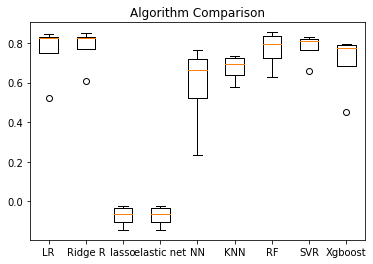

In [ ]:
# ML models to test
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge R',Ridge()))
models.append(('lasso',linear_model.Lasso()))
models.append(('elastic net',ElasticNet()))
#models.append(('GP',GaussianProcessRegressor())) (very poor)
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 1000))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('Xgboost',XGBRegressor(objective='reg:squarederror', n_estimators=1000)))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=4)
    #n_splits=3 : because in train data there are 3 steps of prediction
    #1-2016 features -->predict 2017; 2-16,17-->predict 18; 3-16,17,18-->predict 19
  cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# the best models are: ridge, linear reg, SVR,RF, XGBoost

# Ridge

In [ ]:
model = Ridge()
param_search = { 
    'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']

}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.83611e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.82551e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.85629e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.83611e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.82551e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

In [ ]:
best_model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [ ]:
best_score

0.8160830376830679

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
#overall performance
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 9793.225817372104
MAE is : 67.835090921222
RMSE is : 98.96072866229363
MAPE is : 6.267734541004136 %
R2 is : 0.7479558982384501

SMAPE is : 0.026990746265290903

MASE is : 0.7779168176974158


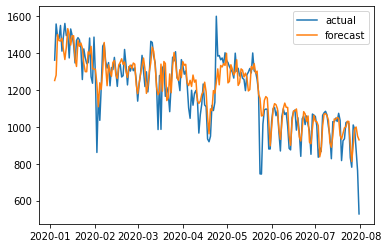

In [ ]:
# plot real vs predictions
time=data.index[-30*7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

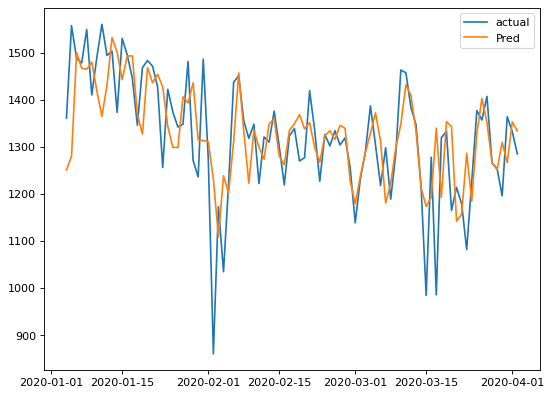

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:90],inv_y[:90],label='actual')
plt.plot(time[:90],inv_yhat[:90],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

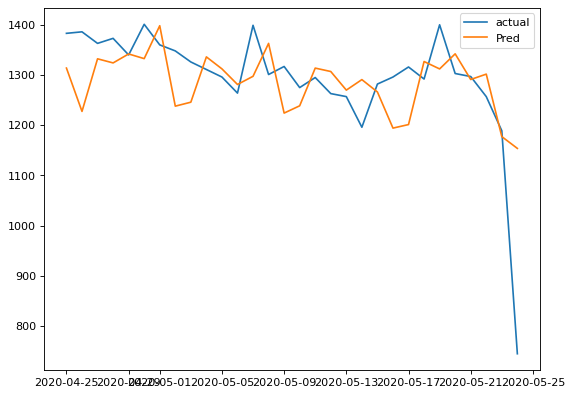

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[112:142],inv_y[112:142],label='actual')
plt.plot(time[112:142],inv_yhat[112:142],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:90], inv_yhat[:90])

Evaluation metric results:-
MSE is : 10112.135122177597
MAE is : 70.77798441465414
RMSE is : 100.55911257652185
MAPE is : 5.670835206297269 %
R2 is : 0.39464741516943536

SMAPE is : 0.05928789387949646

MASE is : 0.7069854784404282


# **same methodology is repeated**

# linear regression

In [ ]:
best_model=LinearRegression()
best_model.fit(X_train,y_train)
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
#overall performance
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 9780.664777001073
MAE is : 68.4684199043621
RMSE is : 98.8972435257984
MAPE is : 6.321034195014229 %
R2 is : 0.7482791764101727

SMAPE is : 0.027230775949216843

MASE is : 0.7851796850486518


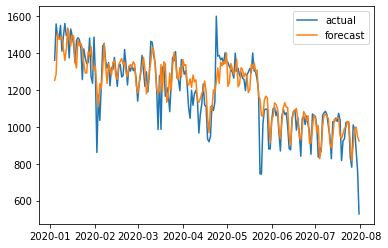

In [ ]:
# plot real vs predictions
time=data.index[-30*7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

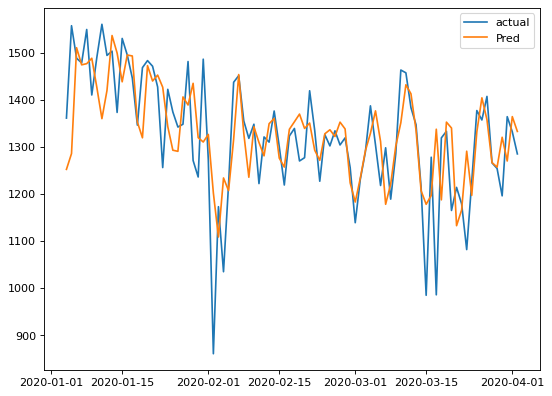

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:90],inv_y[:90],label='actual')
plt.plot(time[:90],inv_yhat[:90],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

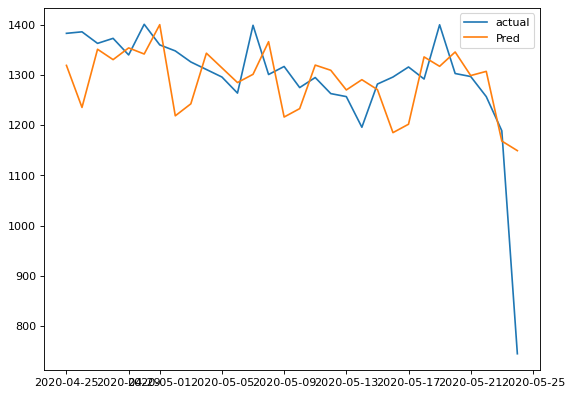

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[112:142],inv_y[112:142],label='actual')
plt.plot(time[112:142],inv_yhat[112:142],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:90], inv_yhat[:90])

Evaluation metric results:-
MSE is : 9955.50621066046
MAE is : 70.82333649792221
RMSE is : 99.7772830390789
MAPE is : 5.66329037917856 %
R2 is : 0.40402384411352155

SMAPE is : 0.05930243873495223

MASE is : 0.7074384902710521


# SVR

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = SVR()
param_search = { 
    #'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3],
    'gamma' : ['scale','auto'],
    'C' : [0.25,0.5,0.75,1],
    'epsilon':[0.0005,0.001,0.005],
    'shrinking':[True,False]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


SVR(C=0.5, cache_size=200, coef0=0.0, degree=1, epsilon=0.001, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [ ]:
best_score

0.7963717366144116

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 9895.47038649003
MAE is : 65.05567650236055
RMSE is : 99.47597894210456
MAPE is : 6.030752455816826 %
R2 is : 0.7453244731019428

SMAPE is : 0.02580415331242587

MASE is : 0.7460431489159594


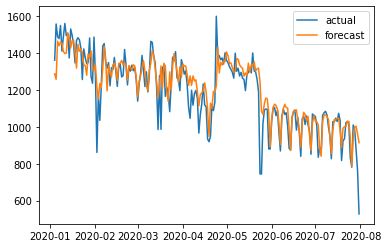

In [ ]:
# plot real vs predictions
time=data.index[-30*7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

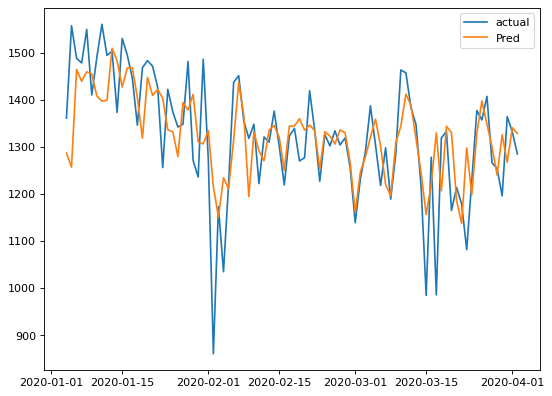

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:90],inv_y[:90],label='actual')
plt.plot(time[:90],inv_yhat[:90],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

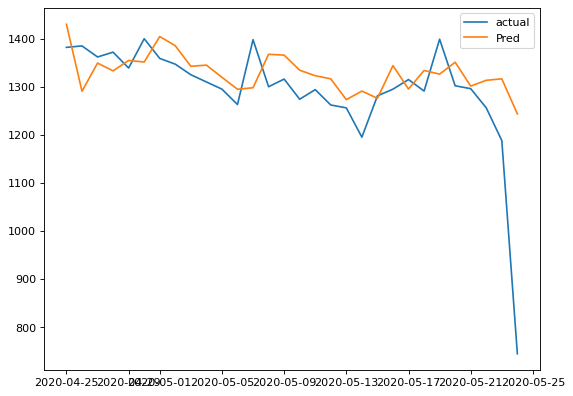

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[112:142],inv_y[112:142],label='actual')
plt.plot(time[112:142],inv_yhat[112:142],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (january to march)
timeseries_evaluation_metrics_func(inv_y[:90], inv_yhat[:90])

Evaluation metric results:-
MSE is : 9537.709195802949
MAE is : 68.37879672774038
RMSE is : 97.66119595726313
MAPE is : 5.447873265267526 %
R2 is : 0.42903483336778936

SMAPE is : 0.057347850343342624

MASE is : 0.683020528481357


# Xgboost

In [ ]:
#train data: all the data except the last 7 months
#test data: the 7 last months

X_train,y_train=data[:-30*7].drop(['max_pdl_daily_load_t'], axis = 1),data[:-30*7].max_pdl_daily_load_t
X_test,y_test=data[-30*7:].drop(['max_pdl_daily_load_t'], axis = 1),data[-30*7:].max_pdl_daily_load_t

In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
param_search = { 
    'n_estimators': [40,50,60,70,80],#[10,20,30],#[10,50,100],#,
    'max_depth' : [2,4,6],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'learning_rate':[0.001,0.01,0.1]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=70,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 10530.20120821769
MAE is : 70.08992454892113
RMSE is : 102.61676865024396
MAPE is : 6.374341136459491 %
R2 is : 0.7289886749894423

SMAPE is : 0.028032348109999758

MASE is : 0.8037747177352272


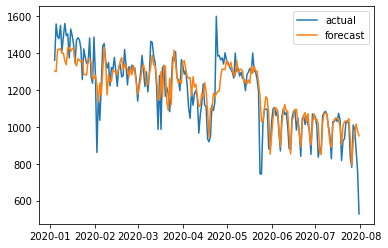

In [ ]:
# plot baseline and predictions
time=data.index[-30*7:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[:90], y_pred[:90])


Evaluation metric results:-
MSE is : 10825.370331854787
MAE is : 78.28616943359376
RMSE is : 104.04503991952133
MAPE is : 6.1393055540079695 %
R2 is : 0.3519503217708968

SMAPE is : 0.06623553770982199

MASE is : 0.7819830616823619


# Random forest

In [ ]:
#train data: all the data except the last 7 months
#test data: the 7 last months

X_train,y_train=data[:-30*7].drop(['max_pdl_daily_load_t'], axis = 1),data[:-30*7].max_pdl_daily_load_t
X_test,y_test=data[-30*7:].drop(['max_pdl_daily_load_t'], axis = 1),data[-30*7:].max_pdl_daily_load_t

In [ ]:
#fine tuning, grid search
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [10,20,30],#[10,20,30],#[10,50,100],#,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,40,50],#[60,62,65,67,69],#[11,12,13],#[10,12,14,16,18,20],
    #'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [6,8,10,12],#[5],#[4,5,6],[1, 2, 3,4],
    'bootstrap' : [True, False]
    #default_criterion for evaluation: mse
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 9992.33188385424
MAE is : 67.04548244849039
RMSE is : 99.96165206645117
MAPE is : 6.2061466265546725 %
R2 is : 0.7428315898014133

SMAPE is : 0.026759357198174863

MASE is : 0.7688617740320709


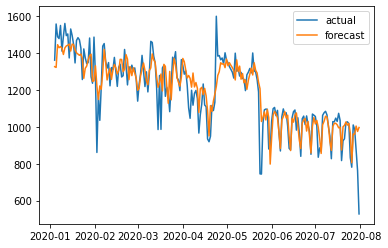

In [ ]:
# plot real vs predictions
time=data.index[-30*7:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[:90], y_pred[:90])

Evaluation metric results:-
MSE is : 9710.421024737487
MAE is : 71.92019159648403
RMSE is : 98.54146855378951
MAPE is : 5.70911886070638 %
R2 is : 0.41869561708822844

SMAPE is : 0.06046977180437596

MASE is : 0.7183947308739707


# ensembling


*   SVR(C=0.5, cache_size=200, coef0=0.0, degree=1, epsilon=0.001, gamma='auto',kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)
*   LinearRegression()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -30*7

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
# get a list of base models
def get_models():
  models = list()
  models.append(('lr', LinearRegression()))

  models.append(('svr', SVR(C=0.5, cache_size=200, coef0=0.0, degree=1, epsilon=0.001, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)))
  return models


In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
  scores = list()
  for name, model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat=yhat.reshape(yhat.shape[0],1)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
    inv_yhat = concatenate((X_test,yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]
    y_test = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((X_test,y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    mae = mean_absolute_error(inv_y, inv_yhat)
    scores.append(-mae)
  return scores


In [ ]:
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)
ranking = 1 + argsort(argsort(scores))
print(ranking)

[-68.4684199043621, -65.05567650236055]
[1 2]


In [ ]:
# create the ensemble
weighted_ensemble = VotingRegressor(estimators=models, weights=ranking)
#verbose --> time consumed while fitting will be printed
# fit the ensemble on the training dataset
weighted_ensemble.fit(X_train, y_train)
# make predictions on test set
weighted_yhat = weighted_ensemble.predict(X_test)
yhat=weighted_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
weighted_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# evaluate predictions using MAE (Mean absolute error)
score = mean_absolute_error(inv_y, weighted_inv_yhat)
print('Weighted Avg MAE: %.3f' % (score))
# evaluate each standalone model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], -scores[i]))



Weighted Avg MAE: 64.062
>lr: 68.468
>svr: 65.056


In [ ]:
# evaluate equal weighting (simple average ensemble)
average_ensemble = VotingRegressor(estimators=models)
average_ensemble.fit(X_train, y_train)
average_yhat = average_ensemble.predict(X_test)

yhat=average_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
simple_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
score = mean_absolute_error(inv_y, simple_inv_yhat)
print('Voting MAE: %.3f' % (score))

Voting MAE: 64.731


# **weighted ensembling**




In [ ]:
#general model performance 
timeseries_evaluation_metrics_func(inv_y, weighted_inv_yhat)

Evaluation metric results:-
MSE is : 9593.217347265043
MAE is : 64.0619605273783
RMSE is : 97.94497101569351
MAPE is : 5.957418537026763 %
R2 is : 0.7531034314550754

SMAPE is : 0.02543271509045272

MASE is : 0.7346474485718556


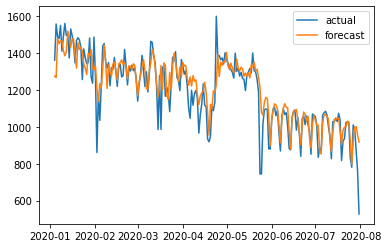

In [ ]:
# plot baseline and predictions
time=data.index[-30*7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,weighted_inv_yhat,label='forecast')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:90], weighted_inv_yhat[:90])

Evaluation metric results:-
MSE is : 9560.963901945563
MAE is : 68.31165913993604
RMSE is : 97.78018153974537
MAPE is : 5.45389818675933 %
R2 is : 0.4276427142650656

SMAPE is : 0.057260775386857414

MASE is : 0.6823499061115943


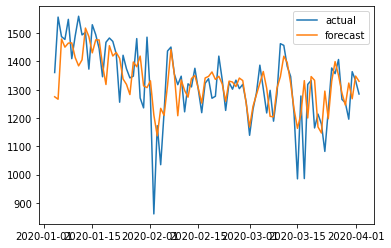

In [ ]:
# plot baseline and predictions
time=data.index[-30*7:][:90]
plt.plot(time,inv_y[:90],label='actual')
plt.plot(time,weighted_inv_yhat[:90],label='forecast')
plt.legend()
plt.show()

# **simple average ensembling**

In [ ]:
timeseries_evaluation_metrics_func(inv_y, simple_inv_yhat)

Evaluation metric results:-
MSE is : 9541.0850161758
MAE is : 64.73050332418993
RMSE is : 97.67847775316629
MAPE is : 6.013277436780422 %
R2 is : 0.7544451391627457

SMAPE is : 0.025709619958666403

MASE is : 0.7423141396299421


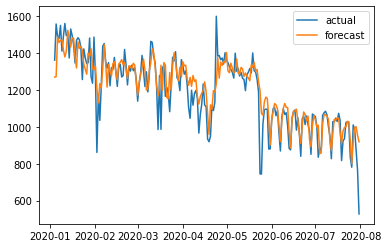

In [ ]:
# plot baseline and predictions
time=data.index[-30*7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,simple_inv_yhat,label='forecast')
plt.legend()
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(inv_y[:90], simple_inv_yhat[:90])

Evaluation metric results:-
MSE is : 9616.09536707058
MAE is : 68.65843313736299
RMSE is : 98.06169163883816
MAPE is : 5.485633636389597 %
R2 is : 0.4243423257204416

SMAPE is : 0.05753600153003041

MASE is : 0.6858137541218073


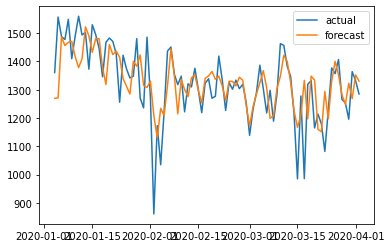

In [ ]:
# plot baseline and predictions
time=data.index[-30*7:][:90]
plt.plot(time,inv_y[:90],label='actual')
plt.plot(time,simple_inv_yhat[:90],label='forecast')
plt.legend()
plt.show()